<h1 id="import_data">Car Price Prediction using Regression Models</h1>

<h3>Import Data</h3>

Import Libraries 

In [49]:
import pandas as pd
import numpy as np

 Load data and store in dataframe df:

In [5]:
path='datasets/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


<h2 id="pattern_visualization">Analyzing Individual Feature Patterns using Visualization</h2>

 Import visualization packages "Matplotlib" and "Seaborn", don't forget about "%matplotlib inline" to plot in a Jupyter notebook.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [7]:
# list the data types for each column
print(df.dtypes)

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object


Calculate the correlation between variables  of type "int64" or "float64" using the method "corr":

In [48]:
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
numeric_df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


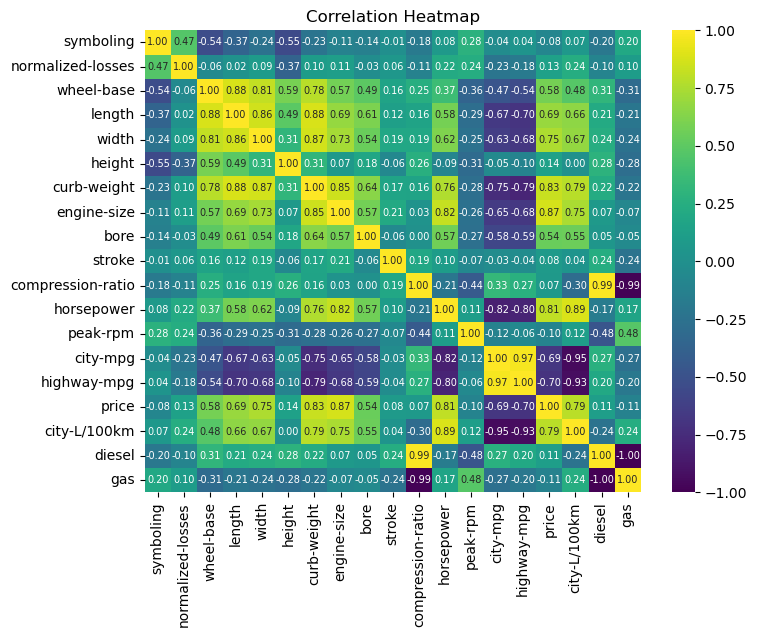

In [26]:
# Create and display heatmap
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f", annot_kws={"size": 7})
plt.title("Correlation Heatmap")
plt.show()

<h2>Continuous numerical variables:</h2> 

<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>

<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>

Several examples of different linear relationships:

<h4>Positive linear relationship</h4>

Let's find the scatterplot of "engine-size" and "price" 

(0.0, 53291.61494174783)

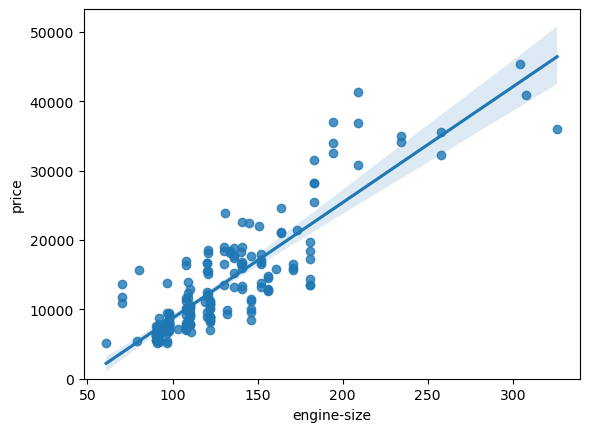

In [27]:
# Engine size as potential predictor variable of price
sns.regplot(x="engine-size", y="price", data=df)
plt.ylim(0,)

<p>As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.</p>

 We can examine the correlation between 'engine-size' and 'price' and see it's approximately  0.87

In [28]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway mpg is a potential predictor variable of price 

<Axes: xlabel='highway-mpg', ylabel='price'>

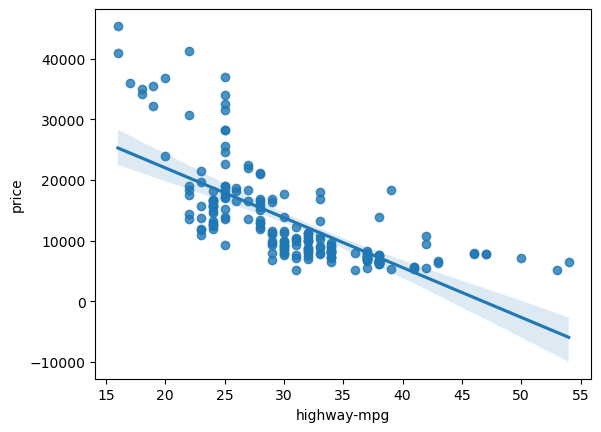

In [29]:
sns.regplot(x="highway-mpg", y="price", data=df)

<p>As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables. Highway mpg could potentially be a predictor of price.</p>

We can examine the correlation between 'highway-mpg' and 'price' and see it's approximately  -0.704

In [31]:
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


<h3>Weak Linear Relationship</h3>

Let's see if "Peak-rpm" as a predictor variable of "price".

<Axes: xlabel='peak-rpm', ylabel='price'>

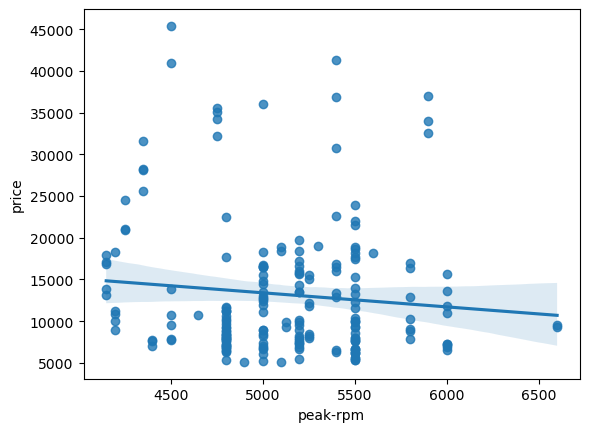

In [30]:
sns.regplot(x="peak-rpm", y="price", data=df)

<p>Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.</p>

We can examine the correlation between 'peak-rpm' and 'price' and see it's approximately -0.101616 

In [32]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


<h2 id="correlation_causation">Correlation and Causation</h2>

<p><b>Correlation</b>: a measure of the extent of interdependence between variables.</p>

<p><b>Causation</b>: the relationship between cause and effect between two variables.</p>

<p>It is important to know the difference between these two and that correlation does not imply causation. Determining correlation is much simpler  the determining causation as causation may require independent experimentation.</p>

<p3>Pearson Correlation</p>
<p>The Pearson Correlation measures the linear dependence between two variables X and Y.</p>
<p>The resulting coefficient is a value between -1 and 1 inclusive, where:</p>
<ul>
    <li><b>1</b>: Total positive linear correlation.</li>
    <li><b>0</b>: No linear correlation, the two variables most likely do not affect each other.</li>
    <li><b>-1</b>: Total negative linear correlation.</li>
</ul>

<p>Pearson Correlation is the default method of the function "corr".  Like before we can calculate the Pearson Correlation of the of the 'int64' or 'float64'  variables.</p>

In [8]:
df = df.select_dtypes(include='number')

df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


 sometimes we would like to know the significant of the correlation estimate. 

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

 We can obtain this information using  "stats" module in the "scipy"  library.

In [37]:
from scipy import stats

<h3>Wheel-base vs Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'. 

In [39]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.5846418222655083  with a P-value of P = 8.076488270732552e-20


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)</p>

<h3>Horsepower vs Price</h3>

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'.

In [15]:
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.36905742825998e-48


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)</p>

<h3>Length vs Price</h3>

Let's calculate the  Pearson Correlation Coefficient and P-value of 'length' and 'price'.

In [16]:
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.690628380448364  with a P-value of P =  8.016477466159053e-30


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).</p>

<h3>Width vs Price</h3>

 Let's calculate the Pearson Correlation Coefficient and P-value of 'width' and 'price':

In [17]:
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value ) 

The Pearson Correlation Coefficient is 0.7512653440522674  with a P-value of P = 9.200335510481426e-38


##### Conclusion:

Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

### Curb-weight vs Price

 Let's calculate the Pearson Correlation Coefficient and P-value of 'curb-weight' and 'price':

In [18]:
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8344145257702846  with a P-value of P =  2.1895772388936997e-53


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).</p>

<h3>Engine-size vs Price</h3>

Let's calculate the Pearson Correlation Coefficient and P-value of 'engine-size' and 'price':

In [19]:
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.8723351674455185  with a P-value of P = 9.265491622197996e-64


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).</p>

<h3>Bore vs Price</h3>

 Let's calculate the  Pearson Correlation Coefficient and P-value of 'bore' and 'price':

In [20]:
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =  ", p_value ) 

The Pearson Correlation Coefficient is 0.5431553832626602  with a P-value of P =   8.049189483935364e-17


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).</p>

 We can relate the process for each 'City-mpg'  and 'Highway-mpg':

<h3>City-mpg vs Price</h3>

In [21]:
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is -0.6865710067844677  with a P-value of P =  2.3211320655676368e-29


<h5>Conclusion:</h5>
<p>Since the p-value is $<$ 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.</p>

<h3>Highway-mpg vs Price</h3>

In [40]:
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print( "The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value ) 

The Pearson Correlation Coefficient is -0.7046922650589533  with a P-value of P =  1.7495471144474792e-31


##### Conclusion:
Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

<h3>Linear Regression and Multiple Linear Regression</h3>

<h4>Linear Regression</h4>


<p>One example of a Data  Model that we will be using is</p>
<b>Simple Linear Regression</b>.

<br>
<p>Simple Linear Regression is a method to help us understand the relationship between two variables:</p>
<ul>
    <li>The predictor/independent variable (X)</li>
    <li>The response/dependent variable (that we want to predict)(Y)</li>
</ul>

<p>The result of Linear Regression is a <b>linear function</b> that predicts the response (dependent) variable as a function of the predictor (independent) variable.</p>



$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$


 <b>Linear function:</b>
$$
Yhat = a + b  X
$$

<ul>
    <li>a refers to the <b>intercept</b> of the regression line0, in other words: the value of Y when X is 0</li>
    <li>b refers to the <b>slope</b> of the regression line, in other words: the value with which Y changes when X increases by 1 unit</li>
</ul>

<h4>Lets load the modules for linear regression</h4>

In [102]:
import operator
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<h4>Create the linear regression object</h4>

In [103]:
lm = LinearRegression()
lm

LinearRegression()

<h4>How could Highway-mpg help us predict car price?</h4>

For this example, we want to look at how highway-mpg can help us predict car price.
Using simple linear regression, we will create a linear function with "highway-mpg" as the predictor variable and the "price" as the response variable.

In [104]:
X = df[['highway-mpg']]
Y = df['price']

Fit the linear model using highway-mpg.

In [105]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [106]:
lm.fit(X_train, Y_train)

LinearRegression()

 We can output a prediction 

In [107]:
Y_pred = lm.predict(X_test)

In [108]:
mse = mean_squared_error(Y_test, Y_pred)
confidence_interval = 1.96 * np.sqrt(mse)

lower_bound = Y_pred - confidence_interval
upper_bound = Y_pred + confidence_interval

In [109]:
r_squared = r2_score(Y_test, Y_pred)

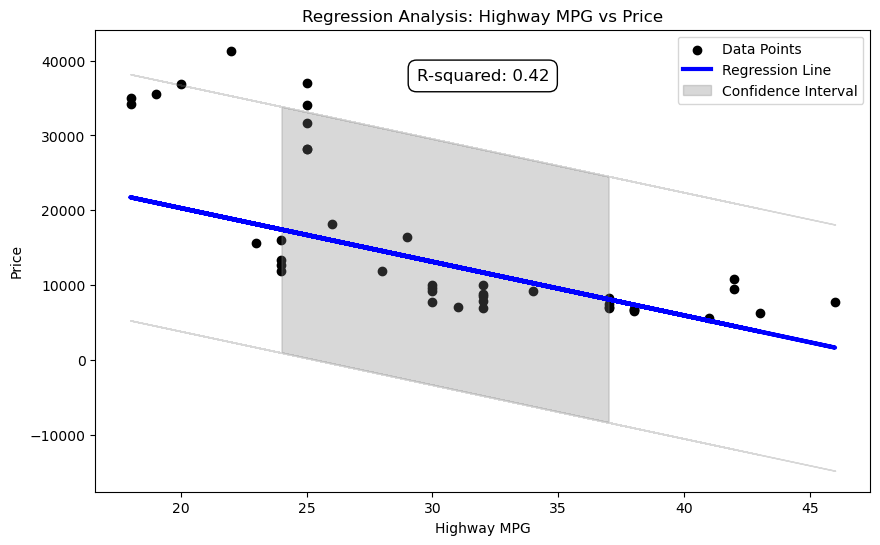

In [110]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test, Y_test, color='black', label='Data Points')
plt.plot(X_test, Y_pred, color='blue', linewidth=3, label='Regression Line')
plt.fill_between(X_test['highway-mpg'], lower_bound, upper_bound, color='gray', alpha=0.3, label='Confidence Interval')
plt.xlabel('Highway MPG')
plt.ylabel('Price')
plt.title('Regression Analysis: Highway MPG vs Price')
plt.legend()

# Display the R-squared as text on the plot
plt.text(0.5, 0.9, f'R-squared: {r_squared:.2f}', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

<h4>What is the value of the intercept (a)?</h4>

In [111]:
lm.intercept_

34634.129926572794

<h4>What is the value of the Slope (b)?</h4>

In [112]:
lm.coef_

array([-716.97578474])

<h3>What is the final estimated linear model we get?</h3>

As we saw above, we should get a final linear model with the structure:

$$
Yhat = a + b  X
$$

Plugging in the actual values we get:

<b>price</b> = 34634.13 - 716.96 x  <b>highway-mpg</b>

<h4>Multiple Linear Regression</h4>


<p>If we want to use more variables in our model to predict car price, we can use <b>Multiple Linear Regression</b>.
Multiple Linear Regression is very similar to Simple Linear Regression, but this method is used to explain the relationship between one continuous response (dependent) variable and <b>two or more</b> predictor (independent) variables.
Most of the real-world regression models involve multiple predictors. We will illustrate the structure by using four predictor variables, but these results can generalize to any integer:</p>

$$
Y: Response \ Variable\\
X_1 :Predictor\ Variable \ 1\\
X_2: Predictor\ Variable \ 2\\
X_3: Predictor\ Variable \ 3\\
X_4: Predictor\ Variable \ 4\\
$$

$$
a: intercept\\
b_1 :coefficients \ of\ Variable \ 1\\
b_2: coefficients \ of\ Variable \ 2\\
b_3: coefficients \ of\ Variable \ 3\\
b_4: coefficients \ of\ Variable \ 4\\
$$

The equation is given by

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>
Let's develop a model using these variables as the predictor variables.

In [122]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

Split the data into training and testing sets

In [123]:
Z_train, Z_test, Y_train, Y_test = train_test_split(Z, df['price'], test_size=0.2, random_state=42)

Fit the linear model using the four above-mentioned variables.

In [124]:
lm.fit(Z_train, Y_train)

LinearRegression()

Make predictions on the test data

In [125]:
Yhat_test = lm.predict(Z_test)
Yhat_test

array([ 7000.11580183, 25413.07270816,  5986.21974059,  7805.05963514,
       13106.37492482,  5789.23184091, 28206.51456908, 11537.88612812,
       20202.11236484, 32120.45658851, 21958.01050862,  7820.46674751,
       14805.02545179, 11109.22597204, 14627.82368809,  6923.39638288,
       11220.80174023,  7384.9889013 , 11249.0072951 , 28414.29761688,
       22259.80875625, 26016.75770214,  6363.5123717 ,  6860.33447877,
       22921.36827568, 10263.84930269, 11252.58763086, 22996.92574761,
       22426.03519449, 15101.54459362, 10732.68354835,  5543.43612164,
       10077.56642026,  6477.60030233,  7796.77999399, 14316.48934824,
        8835.97632737,  8769.53759426, 14748.35734785,  8916.95480634,
       17848.49583592])

What is the value of the intercept(a)?

In [126]:
lm.intercept_

-8009.241208155729

What are the values of the coefficients (b1, b2, b3, b4)?

In [127]:
lm.coef_

array([ 25.9407567 ,   3.7778736 ,  83.14757024, -65.72539722])

 What is the final estimated linear model that we get?

As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

What is the linear function we get in this example?

<b>Price</b> = -8009.241208155729 + 25.9407567 x <b>horsepower</b> + 3.7778736 x <b>curb-weight</b> + 83.14757024 x <b>engine-size</b> + -65.72539722 x <b>highway-mpg</b>

<h3>Model Evaluation using Visualization</h3>

import the visualization package: seaborn

In [119]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

<h3>Regression Plot</h3>

<p>When it comes to simple linear regression, an excellent way to visualize the fit of our model is by using <b>regression plots</b>.</p>

<p>This plot will show a combination of a scattered data points (a <b>scatter plot</b>), as well as the fitted <b>linear regression</b> line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).</p>

 Let's visualize Horsepower as potential predictor variable of price:

(0.0, 48177.03214991634)

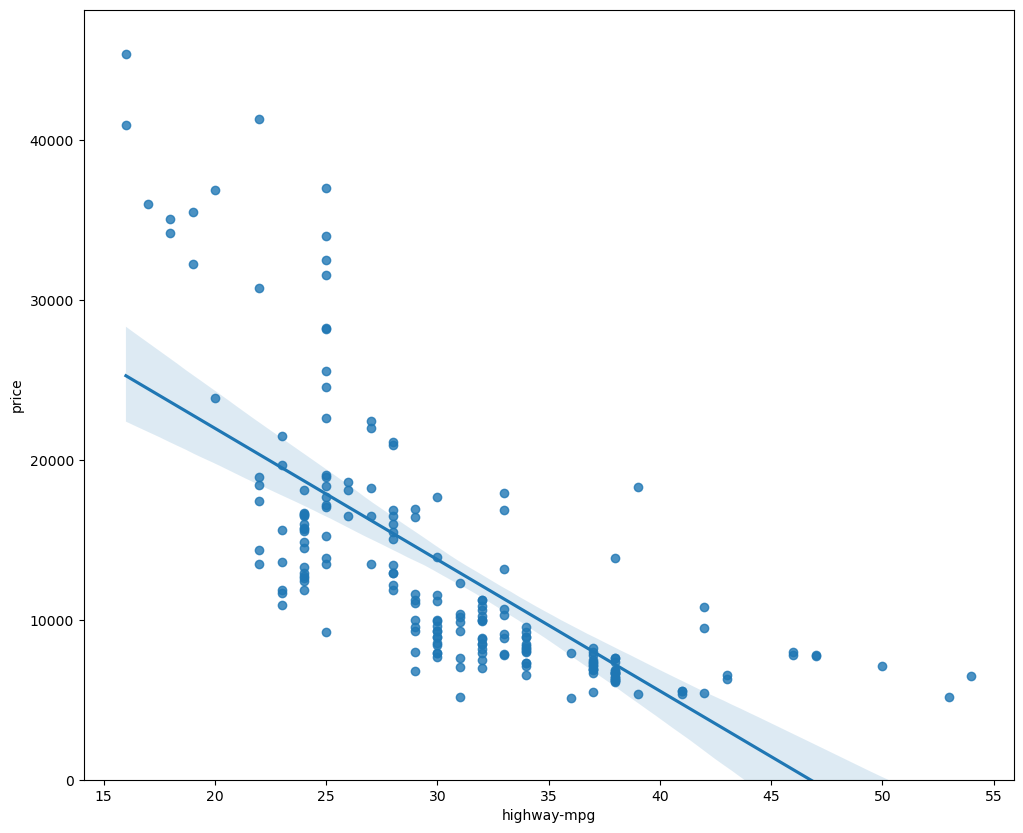

In [122]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

<p>We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative.
One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This provides a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data. Let's compare this plot to the regression plot of "peak-rpm".</p>

(0.0, 47414.1)

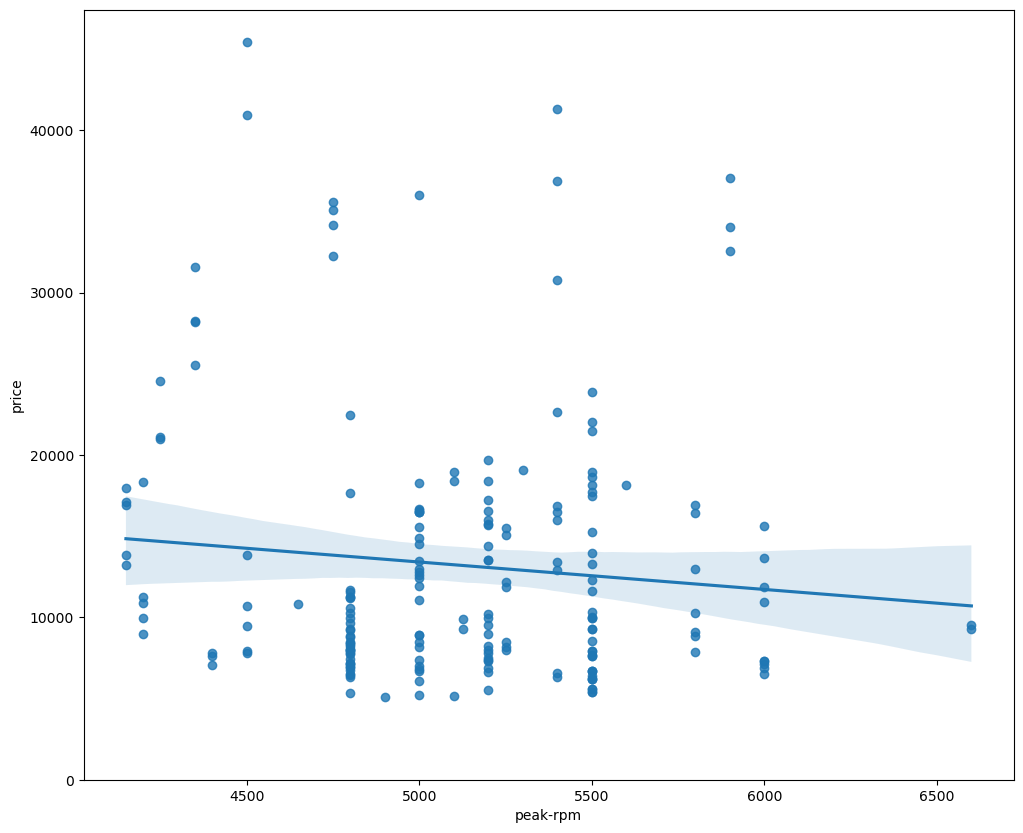

In [123]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

<p>Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.</p>

<h3>Residual Plot</h3>

<p>A good way to visualize the variance of the data is to use a residual plot.</p>

<p>What is a <b>residual</b>?</p>

<p>The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.</p>

<p>So what is a <b>residual plot</b>?</p>

<p>A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.</p>

<p>What do we pay attention to when looking at a residual plot?</p>

<p>We look at the spread of the residuals:</p>

<p>- If the points in a residual plot are <b>randomly spread out around the x-axis</b>, then a <b>linear model is appropriate</b> for the data. Why is that? Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.</p>

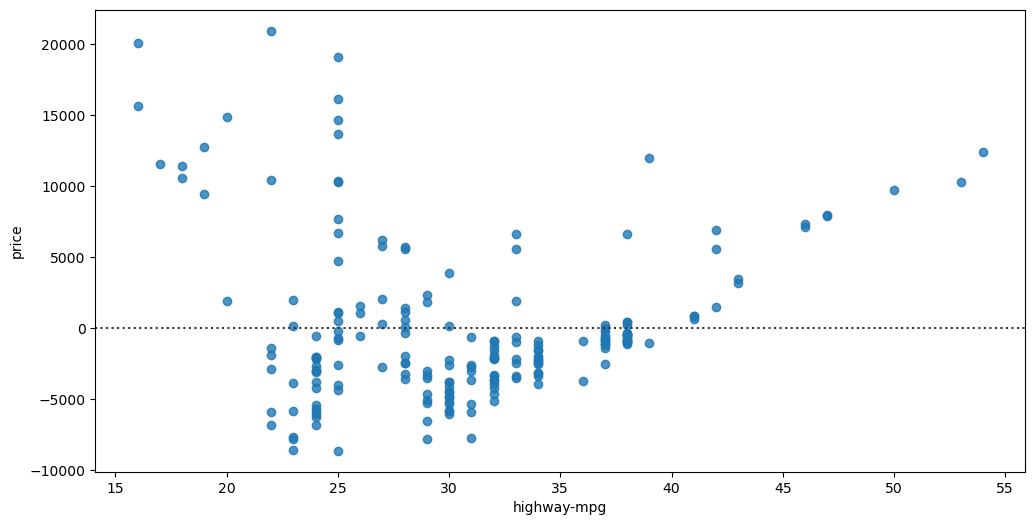

In [126]:
width = 12
height = 6
plt.figure(figsize=(width, height))

# Create a residual plot
sns.residplot(x=df['highway-mpg'], y=df['price'])

plt.show()

<i>What is this plot telling us?</i>

<p>We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.</p>

<h3>Multiple Linear Regression</h3>

<p>How do we visualize a model for Multiple Linear Regression? This gets a bit more complicated because you can't visualize it with regression or residual plot.</p>

<p>One way to look at the fit of the model is by looking at the <b>distribution plot</b>: We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.</p>

First lets make a prediction 

In [133]:
Y_hat = lm.predict(Z_test)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16176\4196657742.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
C:\Users\Asus\AppData\Local\Temp\ipykernel_16176\4196657742.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

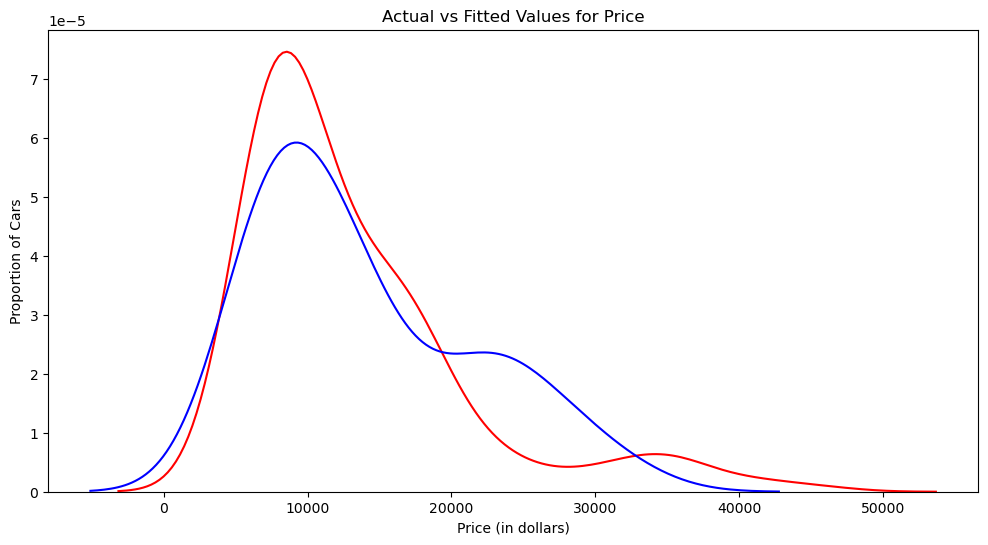

In [134]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.</p>

<h2>Polynomial Regression</h2>

<p><b>Polynomial regression</b> is a particular case of the general linear regression model or multiple linear regression models.</p> 
<p>We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.</p>

<p>There are different orders of polynomial regression:</p>

<center><b>Quadratic - 2nd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 
$$


<center><b>Cubic - 3rd order</b></center>
$$
Yhat = a + b_1 X^2 +b_2 X^2 +b_3 X^3\\
$$


<center><b>Higher order</b>:</center>
$$
Y = a + b_1 X^2 +b_2 X^2 +b_3 X^3 ....\\
$$

<p>We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.</p>

In [193]:
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

lets get the variables

In [194]:
x = df['highway-mpg']
y = df['price']

Let's fit the polynomial using the function <b>polyfit</b>, then use the function <b>poly1d</b> to display the polynomial function.

In [211]:
x_train, x_test, y_train, y_test = train_test_split(df['highway-mpg'], df['price'], test_size=0.2, random_state=42)


# Here we use a polynomial of the 3rd order (cubic) 
coefficients = np.polyfit(x_train, y_train, 3)
poly_model = np.poly1d(coefficients)
print(poly_model)

       3         2
-1.57 x + 200.9 x - 8587 x + 1.302e+05


 Let's plot the function 

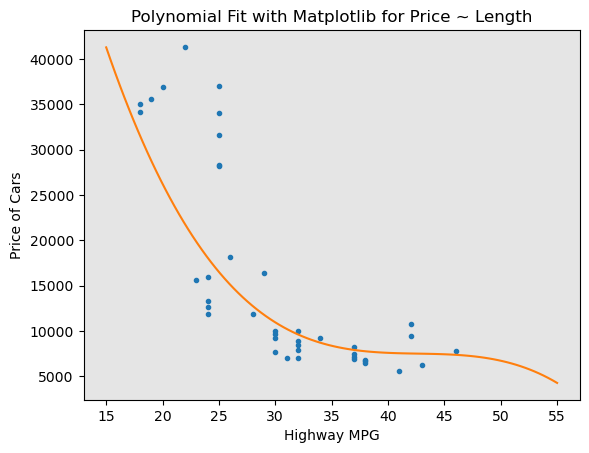

In [196]:
PlotPolly(poly_model, x_test, y_test, 'Highway MPG')

In [197]:
np.polyfit(x_train, y_train, 3)

array([-1.57013422e+00,  2.00859687e+02, -8.58653944e+03,  1.30169145e+05])

<p>We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function  "hits" more of the data points.</p>

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:</p>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

We can perform a polynomial transform on multiple features. First, we import the module:

In [206]:
from sklearn.preprocessing import PolynomialFeatures

We create a <b>PolynomialFeatures</b> object of degree 2: 

In [207]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures()

In [208]:
Z_pr=pr.fit_transform(Z_train)

The original data is of 201 samples and 4 features 

In [209]:
Z.shape

(201, 4)

After the transformation, there 160 samples and 15 features

In [210]:
Z_pr.shape

(160, 15)

<h2>Measures for In-Sample Evaluation</h2>

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.</p>

<p>Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>
<ul>
    <li><b>R^2 / R-squared</b></li>
    <li><b>Mean Squared Error (MSE)</b></li>
</ul>
    
<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

<h3>Model 1: Simple Linear Regression</h3>

Let's calculate the R^2

In [160]:
# Fit the linear regression model to the training data
lm.fit(X_train, Y_train)

# Calculate the R-squared value for the test set
r2_test = lm.score(X_test, Y_test)

# Print the R-squared value
print('The R-squared (R2) for the test set is: ', r2_test)

The R-squared (R2) for the test set is:  0.4246692398775024


We can say that ~ 42.4669% of the variation of the price is explained by this simple linear model "horsepower_fit".

Let's calculate the MSE

We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

In [161]:
Yhat=lm.predict(X_test)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [ 8106.02589137 18860.6626624   7389.05010663 10256.95324557]


lets import the function <b>mean_squared_error</b> from the module <b>metrics</b>

In [151]:
from sklearn.metrics import mean_squared_error

we compare the predicted results with the actual results 

In [162]:
mse = mean_squared_error(Y_test, Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  70389861.95619813


<h3>Model 2: Multiple Linear Regression</h3>

Let's calculate the R^2

In [191]:
from sklearn.metrics import r2_score, mean_squared_error

# fit the model 
lm.fit(Z_train, Y_train)

# Make predictions on the test data
Y_pred = lm.predict(Z_test)

# Calculate R^2 (coefficient of determination)
r2 = r2_score(Y_test, Y_pred)

print("R^2:", r2)

R^2: 0.7636515722189385


We can say that ~ 76.365 % of the variation of price is explained by this multiple linear regression "multi_fit".

Let's calculate the MSE

 We compare the predicted results with the actual results 

In [178]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(Y_test, Y_pred))

The mean square error of price and predicted value using multifit is:  28916467.462179814


<h3>Model 3: Polynomial Fit</h3>

Let's calculate the R^2

We apply the function to get the value of r^2

In [212]:
y_pred = poly_model(x_test)  # Predicted values using the polynomial model

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("R-squared:", r2)

R-squared: 0.601406504827412


We can say that ~ 60.141 % of the variation of price is explained by this polynomial fit

<h3>MSE</h3>

We can also calculate the MSE:  

In [214]:
y_pred = poly_model(x_test)  # Predicted values using the polynomial model

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 48766627.90611646


<h2>Prediction and Decision Making</h2>
<h3>Prediction</h3>

<p>In the previous section, we trained the model using the method <b>fit</b>. Now we will use the method <b>predict</b> to produce a prediction. Lets import <b>pyplot</b> for plotting; we will also be using some functions from numpy.</p>

In [181]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

Create a new input 

In [182]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

 Fit the model 

In [186]:
lm.fit(X_train, Y_train)
lm

LinearRegression()

Produce a prediction

In [189]:
yhat=lm.predict(new_input)
yhat[0:5]

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([33917.15414184, 33200.1783571 , 32483.20257237, 31766.22678763,
       31049.2510029 ])

we can plot the data 

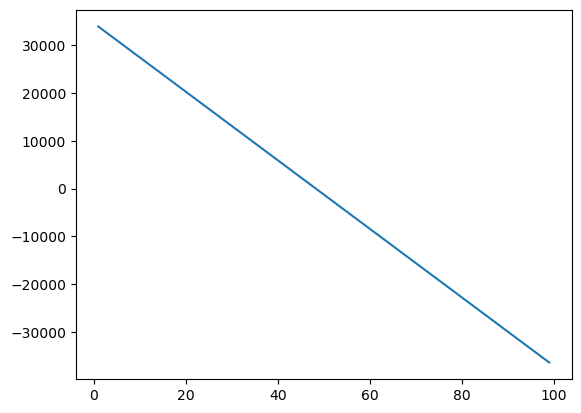

In [190]:
plt.plot(new_input, yhat)
plt.show()

<h3>Decision Making: Determining a Good Model Fit</h3>

<p>Now that different models have been visualized, and generate the R-squared and MSE values for the fits, how does one determine a good model fit?
<ul>
    <li><i>What is a good R-squared value?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the higher R-squared value is a better fit</b> for the data.
<ul>
    <li><i>What is a good MSE?</i></li>
</ul>
</p>

<p>When comparing models, <b>the model with the smallest MSE value is a better fit</b> for the data.</p>


<h4>Let's take a look at the values for the different models.</h4>
<p>Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.4246692398775024</li>
    <li>MSE: 7.04 x 10^7</li>
</ul>
</p>
    
<p>Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.
<ul>
    <li>R-squared: 0.7636515722189385</li>
    <li>MSE: 2.89 x 10^7</li>
</ul>
</p>
    
<p>Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.
<ul>
    <li>R-squared: 0.601406504827412</li>
    <li>MSE: 4.88 x 10^7</li>
</ul>
</p>

<h3>Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)</h3>

<p>In predictive modeling, using more variables can sometimes make predictions better, but not always. For example, when there isn't much data or when some variables don't really help and may even hurt, adding more can cause problems. So, it's important to look at things like the Mean Squared Error (MSE) and the Coefficient of Determination (R^2) to see if the model is doing well. In short, adding more variables can be a good idea, but it's important to be careful and see if they actually make the model better or worse.</p>

<p>To compare the results of the multiple linear regression (MLR) and simple linear regression (SLR) models, one should examine a combination of both the R-squared and MSE metrics to arrive at the most informed conclusion regarding the models' fitness.
<ul>
    <li><b>MSE</b>The MSE of SLR is  7.04 x 10^7  while MLR has an MSE of 2.89 x 10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.425) is very small compared to the R-squared for the MLR (~0.764).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

<h3>Simple Linear Model (SLR) vs Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, it can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.</p>

<h3>Multiple Linear Regression (MLR) vs Polynomial Fit</h3>

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also larger than for the Polynomial Fit.</li>
</ul>

<h2>Conclusion:</h2>

<p>Comparing these three models, it can be concluded that <b>the MLR model is the best model</b> to be able to predict price from our dataset. This result makes sense, since the dataset has 27 variables in total, and it is a fact that more than one of those variables are potential predictors of the final car price.</p>